In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.fft import fft2, ifft2, fftshift, ifftshift
import time
aerial = mpimg.imread("C:/Users/kamuj/Downloads/ivp/ivp assignment2/5.1.10.tiff")
babboon = mpimg.imread("C:/Users/kamuj/Downloads/ivp/ivp assignment3/4.2.03.tiff")

In [2]:
def circular_convolution_ft(img, kernel):
    # Perform FFT on the image and kernel
    img_fft = fft2(img)
    kernel_fft = fft2(kernel, s=img.shape)
    img_fft_shifted = fftshift(img_fft)
    kernel_fft_shifted = fftshift(kernel_fft)
    result_fft_shifted = img_fft_shifted * kernel_fft_shifted
    result_fft = ifftshift(result_fft_shifted)
    result = ifft2(result_fft)
    result = np.real(result)

    return result
img = aerial
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)
result = circular_convolution_ft(img, kernel)

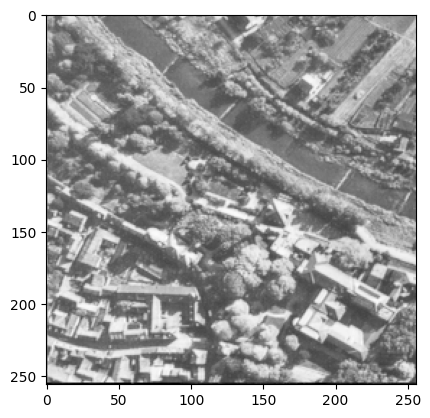

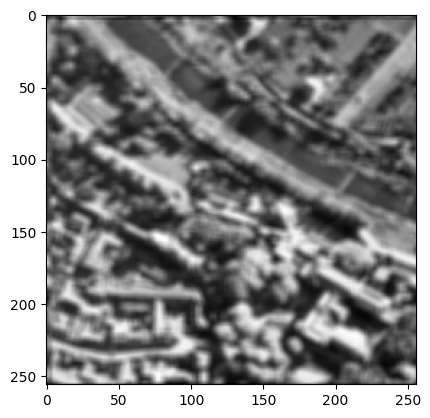

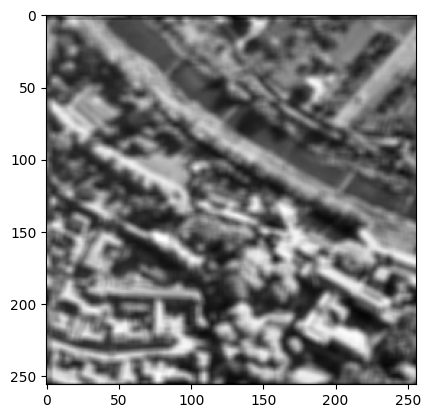

In [3]:
def circular_convolution(image, kernel):
    # Get dimensions of the image and the kernel
    height, width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    result = np.zeros_like(image)
    # Pad the image and kernel to handle circular convolution
    pad_height = kernel_height - 1
    pad_width = kernel_width - 1
    padded_image = np.pad(image, ((pad_height, 0), (pad_width, 0)), mode='wrap')

    # Perform circular convolution
    for i in range(height):
        for j in range(width):
            result[i, j] = np.sum(padded_image[i:i + kernel_height, j:j + kernel_width] * kernel)

    # Convert result back to image
    result_image = result.astype('uint8')

    return result_image


# Read the image
image = aerial
kernel_size = 5
averaging_filter = np.ones((kernel_size, kernel_size), dtype=np.float64) / (kernel_size * kernel_size)
convolved_image = circular_convolution(image, averaging_filter)
plt.imshow(image, cmap='gray')
plt.show()
plt.imshow(convolved_image, cmap = 'gray')
plt.show()
plt.imshow(result, cmap = 'gray')
plt.show()

We can see that the IDFT of the product of the image and filter DFT  and the circular convolution does indeed result in circular convolution.

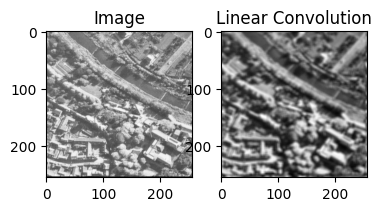

In [4]:
def linear_convolution(img, kernel):
    # Pad the kernel to the size of the image
    padded_kernel = np.pad(kernel, ((0, img.shape[0] - kernel.shape[0]), (0, img.shape[1] - kernel.shape[1])), 'constant')
    result = circular_convolution(img, padded_kernel)

    return result

result_linear = linear_convolution(aerial, averaging_filter)

plt.subplot(1, 3, 1), plt.imshow(aerial, cmap='gray'), plt.title('Image')
plt.subplot(1, 3, 2), plt.imshow(result_linear, cmap='gray'), plt.title('Linear Convolution')
plt.show()


In [5]:
kernel_sizes = [3, 5, 7, 20]

for kernel_size in kernel_sizes:
    image = aerial
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float64) / (kernel_size * kernel_size)

    # Direct Convolution
    start_time = time.time()
    direct_result = linear_convolution(image, kernel)
    direct_time = time.time() - start_time

    # Frequency Domain Convolution
    start_time = time.time()
    frequency_result = circular_convolution_ft(image, kernel)
    frequency_time = time.time() - start_time

    print(f"Kernel Size: {kernel_size}x{kernel_size}")
    print(f"Direct Convolution Time: {direct_time:.6f} seconds")
    print(f"Frequency Domain Convolution Time: {frequency_time:.6f} seconds\n")


Kernel Size: 3x3
Direct Convolution Time: 8.465720 seconds
Frequency Domain Convolution Time: 0.005002 seconds

Kernel Size: 5x5
Direct Convolution Time: 7.480615 seconds
Frequency Domain Convolution Time: 0.008003 seconds

Kernel Size: 7x7
Direct Convolution Time: 7.840354 seconds
Frequency Domain Convolution Time: 0.005002 seconds

Kernel Size: 20x20
Direct Convolution Time: 8.437905 seconds
Frequency Domain Convolution Time: 0.005000 seconds



We can observe that the dft is taking lot less time compared to direct convolution

# 2

1

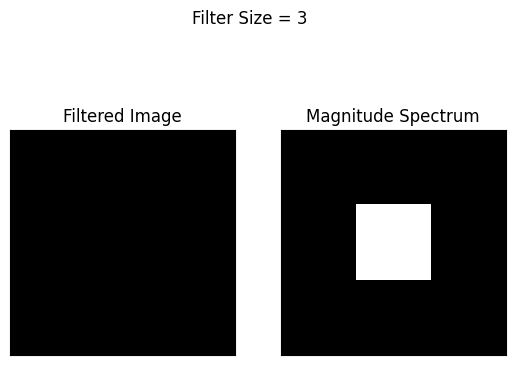

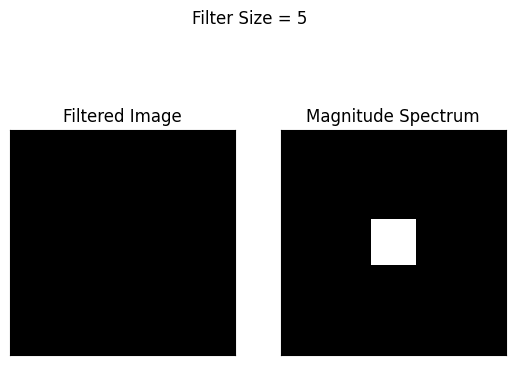

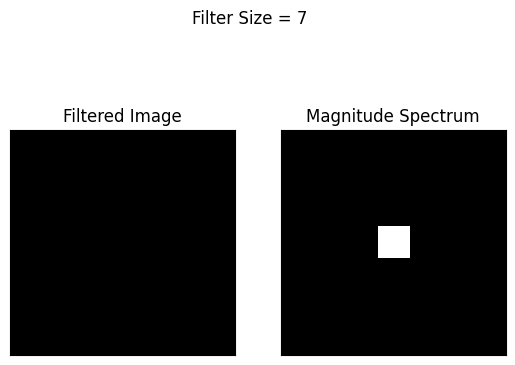

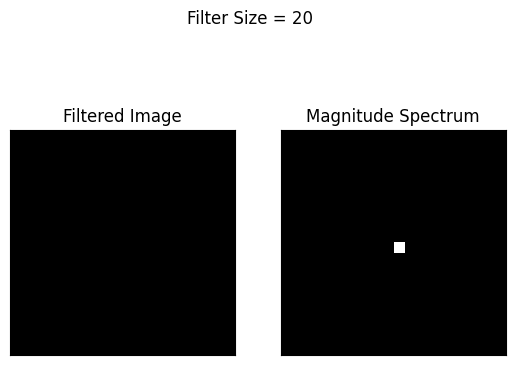

In [6]:
def averaging_filter(image, filter_size):
    height, width = image.shape
    kernel = np.ones((filter_size, filter_size)) / (filter_size**2)
    
    # Apply 2D convolution without padding
    filtered_image = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            i_start, i_end = max(0, i - filter_size//2), min(height, i + filter_size//2)
            j_start, j_end = max(0, j - filter_size//2), min(width, j + filter_size//2)

            region = image[i_start:i_end, j_start:j_end]
            filtered_image[i, j] = np.sum(region * kernel[i_start - i + filter_size//2:i_end - i + filter_size//2, j_start - j + filter_size//2:j_end - j + filter_size//2])
    filtered_image = kernel
    return filtered_image

def plot_spectrum(image, title):
    spectrum = fftshift(np.abs(fft2(image)))

    plt.subplot(121), plt.imshow(image, cmap='gray')
    plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(122), plt.imshow(np.log1p(spectrum), cmap='gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

    plt.suptitle(title)
    plt.show()

# Experiment with different filter parameters (sizes)
filter_sizes = [3, 5, 7, 20]

for size in filter_sizes:
    filtered_image = averaging_filter(aerial, filter_size=size)
    plot_spectrum(filtered_image, f'Filter Size = {size}')


Here the parameter is the kernel size. This bright spot corresponds to the low-frequency components of the image that the filter aims to preserve, so we conclude this as low pass filter. As size increases magnitude spectrum becomes smoother

2

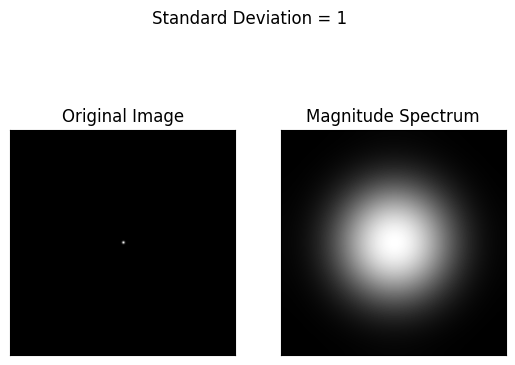

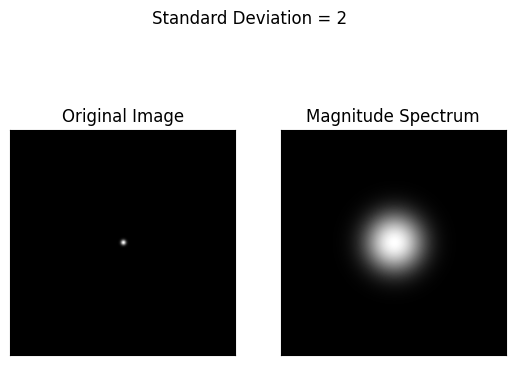

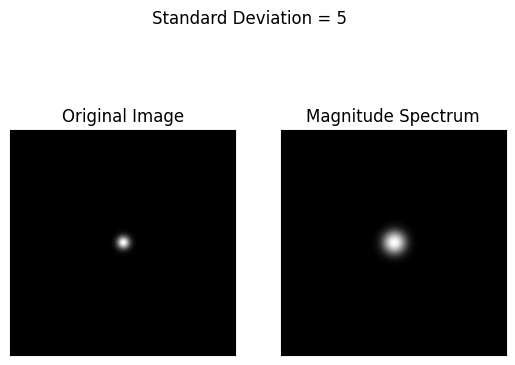

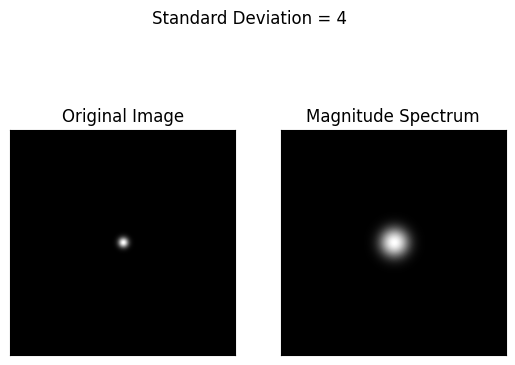

In [7]:
def gaussian_filter(image, sigma):
    height, width = image.shape
    x, y = np.meshgrid(np.arange(-width//2, width//2), np.arange(-height//2, height//2))
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)
    kernel = kernel / np.sum(kernel)  # Normalize the kernel

    # Apply 2D convolution without padding
    filtered_image = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            i_start, i_end = max(0, i - height//2), min(height, i + height//2)
            j_start, j_end = max(0, j - width//2), min(width, j + width//2)

            region = image[i_start:i_end, j_start:j_end]
            filtered_image[i, j] = np.sum(region * kernel[i_start - i + height//2:i_end - i + height//2, j_start - j + width//2:j_end - j + width//2])
    filtered_image = kernel
    return filtered_image

def plot_spectrum(image, title):
    spectrum = fftshift(np.abs(fft2(image)))

    plt.subplot(121), plt.imshow(image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(122), plt.imshow(np.log1p(spectrum), cmap='gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

    plt.suptitle(title)
    plt.show()

image = aerial

# Experiment with different standard deviations
sigmas = [1, 2, 5, 4]

for sigma in sigmas:
    filtered_image = gaussian_filter(image, sigma=sigma)
    plot_spectrum(filtered_image, f'Standard Deviation = {sigma}')

Here the parameter is the sigma. This bright spot corresponds to the low-frequency components of the image that the filter aims to preserve, so we conclude this as low pass filter. As standard deviation increases it results in wider frequency response in magnitude spectrum

3

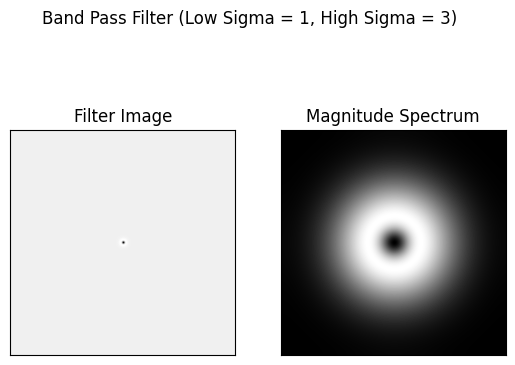

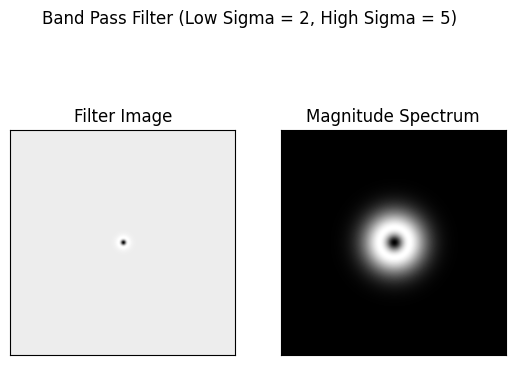

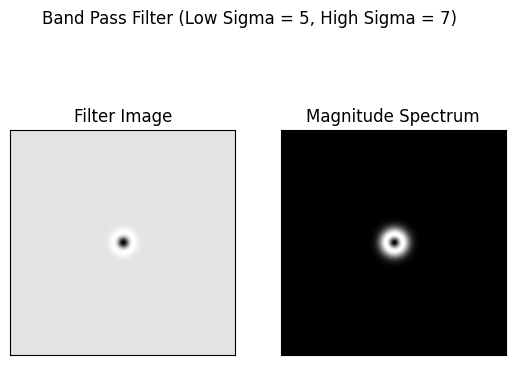

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, fftshift

def gaussian_filter(image, sigma):
    height, width = image.shape
    x, y = np.meshgrid(np.arange(-width//2, width//2), np.arange(-height//2, height//2))
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)
    kernel = kernel / np.sum(kernel)  # Normalize the kernel

    # Apply 2D convolution without padding
    filtered_image = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            i_start, i_end = max(0, i - height//2), min(height, i + height//2)
            j_start, j_end = max(0, j - width//2), min(width, j + width//2)

            region = image[i_start:i_end, j_start:j_end]
            filtered_image[i, j] = np.sum(region * kernel[i_start - i + height//2:i_end - i + height//2, j_start - j + width//2:j_end - j + width//2])
    filtered_image = kernel
    return filtered_image

def band_pass_filter(image, low_sigma, high_sigma):
    low_pass = gaussian_filter(image, sigma=low_sigma)
    high_pass = gaussian_filter(image, sigma=high_sigma)
    band_pass = high_pass - low_pass
    return band_pass

def plot_spectrum(image, title):
    spectrum = fftshift(np.abs(fft2(image)))

    plt.subplot(121), plt.imshow(image, cmap='gray')
    plt.title('Filter Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(122), plt.imshow(np.log1p(spectrum), cmap='gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

    plt.suptitle(title)
    plt.show()
low_sigma_values = [1, 2, 5]
high_sigma_values = [3, 5, 7]

for low_sigma, high_sigma in zip(low_sigma_values, high_sigma_values):
    band_pass_filter_image = band_pass_filter(aerial, low_sigma, high_sigma)
    plot_spectrum(band_pass_filter_image, f'Band Pass Filter (Low Sigma = {low_sigma}, High Sigma = {high_sigma})')


The low_sigma and high_sigma parameters control the spread or width of the Gaussian filters used for low-pass and high-pass components, respectively.
Larger low_sigma values result in a smoother low-pass filter, allowing lower frequencies to pass through.
Larger high_sigma values result in a smoother high-pass filter, allowing higher frequencies to pass through.
The subtraction of these two filters generates a band-pass filter that retains frequencies within a specific range, effectively attenuating both low and high frequencies.
The magnitude spectrum of the band-pass filter should show a central region of frequencies that are allowed to pass through, with low and high frequencies attenuated.

4

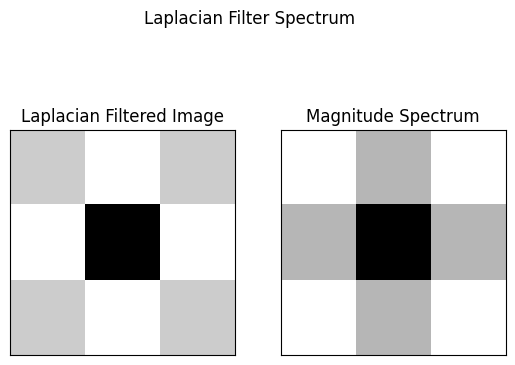

In [9]:
def laplacian_filter(image):
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    
    # Apply the Laplacian operator without using convolve
    laplacian_response = np.zeros_like(image)
    height, width = image.shape

    for i in range(1, height-1):
        for j in range(1, width-1):
            region = image[i-1:i+2, j-1:j+2]
            laplacian_response[i, j] = np.sum(region * laplacian_kernel)
    return laplacian_kernel

def plot_spectrum(image, title):
    spectrum = fftshift(np.abs(fft2(image)))

    plt.subplot(121), plt.imshow(image, cmap='gray')
    plt.title('Laplacian Filtered Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(122), plt.imshow(np.log1p(spectrum), cmap='gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

    plt.suptitle(title)
    plt.show()

# Apply the Laplacian filter to the image and plot the DFT magnitude spectrum
laplacian_filtered_image = laplacian_filter(aerial)
plot_spectrum(laplacian_filtered_image, 'Laplacian Filter Spectrum')


# 3

(256, 256)


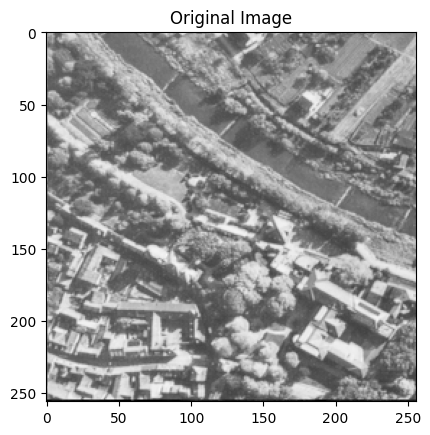

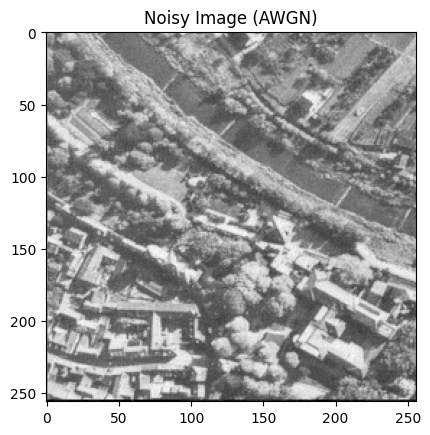

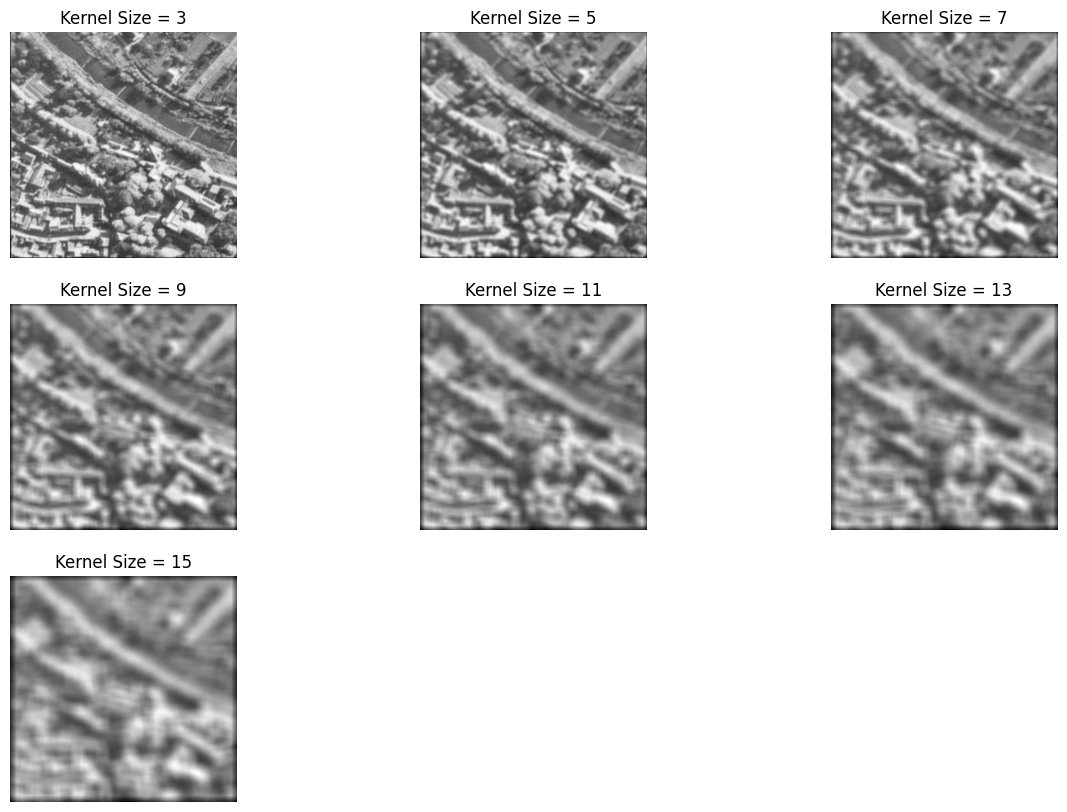

Optimal window size for denoising: None


In [10]:
image =aerial

# Add additive white Gaussian noise with zero mean and variance σ^2 = 25
sigma = np.sqrt(25)
noise = np.random.normal(0, sigma, size=image.shape)
noisy_image = np.clip(image + noise, 0, 255)  # Clip to [0, 255] for display
print(noisy_image.shape)

def averaging_filter(image, filter_size):
    height, width = image.shape
    kernel = np.ones((filter_size, filter_size)) / (filter_size**2)
    
    # Apply 2D convolution without padding
    filtered_image = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            i_start, i_end = max(0, i - filter_size//2), min(height, i + filter_size//2)
            j_start, j_end = max(0, j - filter_size//2), min(width, j + filter_size//2)

            region = image[i_start:i_end, j_start:j_end]
            filtered_image[i, j] = np.sum(region * kernel[i_start - i + filter_size//2:i_end - i + filter_size//2, j_start - j + filter_size//2:j_end - j + filter_size//2])

    return filtered_image

# Vary window size from 3 to 15 in increments of 2
kernel_sizes = np.arange(3, 16, 2)

plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.show()

plt.imshow(noisy_image, cmap='gray', vmin=0, vmax=255)
plt.title('Noisy Image (AWGN)')
plt.show()

# Find optimal window size by comparing denoising and smoothing
best_window_size = None
best_score = float('inf')

plt.figure(figsize=(15, 10))
for kernel_size in kernel_sizes:
    denoised_image = averaging_filter(noisy_image, kernel_size)
    plt.subplot(3, 3, int((kernel_size -1)// 2))
    plt.imshow(denoised_image, cmap='gray')
    plt.title(f'Kernel Size = {kernel_size}')
    plt.axis('off')

plt.show()


print(f"Optimal window size for denoising: {best_window_size}")


we can see that the 3*3 is the optimal size

Image Shape: (256, 256)


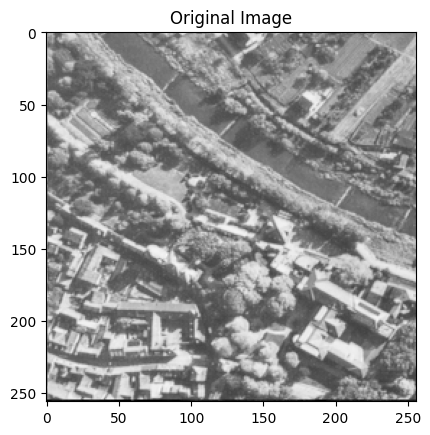

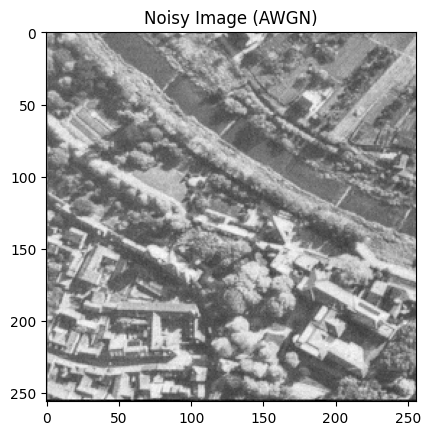

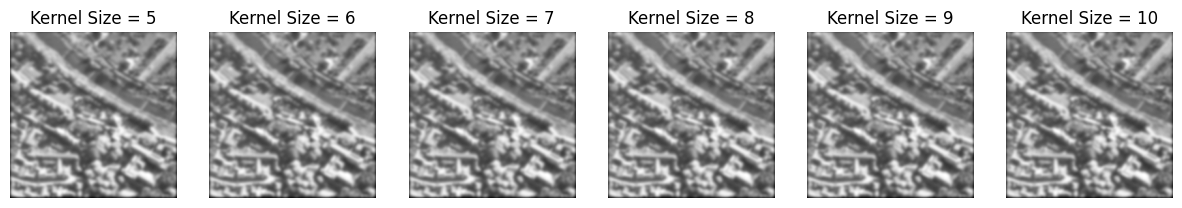

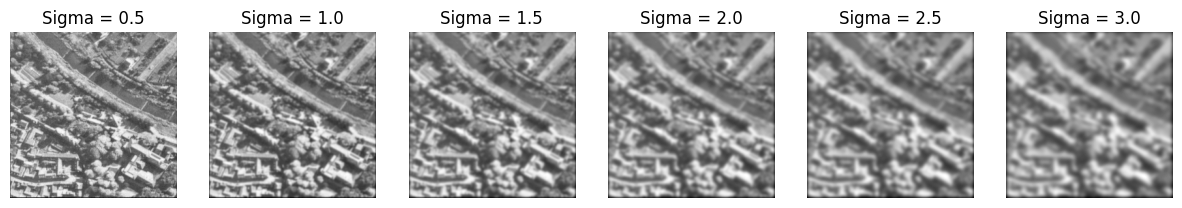

In [11]:
sigma = np.sqrt(25)
noise = np.random.normal(0, sigma, size=aerial.shape)
noisy_image = np.clip(aerial + noise, 0, 255)  # Clip to [0, 255] for display

print("Image Shape:", noisy_image.shape)

def gaussian_filter(image, sigma, kernel_size):
    height, width = image.shape
    x, y = np.meshgrid(np.arange(-width//2, width//2), np.arange(-height//2, height//2))
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)
    kernel = kernel / np.sum(kernel)  # Normalize the kernel

    # Apply 2D convolution without padding
    filtered_image = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            i_start, i_end = max(0, i - height//2), min(height, i + height//2)
            j_start, j_end = max(0, j - width//2), min(width, j + width//2)

            region = image[i_start:i_end, j_start:j_end]
            filtered_image[i, j] = np.sum(region * kernel[i_start - i + height//2:i_end - i + height//2, j_start - j + width//2:j_end - j + width//2])

    return filtered_image

# Vary kernel size from 5 to 10
kernel_sizes = np.arange(5, 11, 1)

# Vary standard deviation from 0.5 to 5
sigma_values = np.arange(0.5, 3.5, 0.5)

# Plot the original and noisy images
plt.imshow(aerial, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.show()

plt.imshow(noisy_image, cmap='gray', vmin=0, vmax=255)
plt.title('Noisy Image (AWGN)')
plt.show()

# Denoising with varying kernel sizes
plt.figure(figsize=(15, 5))
subplot_idx = 1

for kernel_size in kernel_sizes:
    denoised_image = gaussian_filter(noisy_image, 2, kernel_size)  # Fixing sigma at 2
    plt.subplot(1, len(kernel_sizes), subplot_idx)
    plt.imshow(denoised_image, cmap='gray')
    plt.title(f'Kernel Size = {kernel_size}')
    plt.axis('off')
    subplot_idx += 1

plt.show()

# Denoising with varying standard deviations
plt.figure(figsize=(15, 10))
subplot_idx = 1

for sigma_value in sigma_values:
    denoised_image = gaussian_filter(noisy_image, sigma_value, 5)  # Fixing kernel size at 5
    plt.subplot(1, len(sigma_values),subplot_idx)
    plt.imshow(denoised_image, cmap='gray')
    plt.title(f'Sigma = {sigma_value}')
    plt.axis('off')
    subplot_idx += 1

plt.show()


we can see that 0.5 is the optimal deviation

2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import matplotlib.image as mpimg

def gaussian_filter(image, sigma):
    height, width = image.shape
    x, y = np.meshgrid(np.arange(-width//2, width//2), np.arange(-height//2, height//2))
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)
    kernel = kernel / np.sum(kernel)  # Normalize the kernel
    # Apply 2D convolution using scipy's convolve2d
    filtered_image = convolve2d(image, kernel, mode='same', boundary='symm')
    return filtered_image

def band_pass_filter(image, low_sigma, high_sigma):
    low_pass = gaussian_filter(image, low_sigma)
    high_pass = gaussian_filter(image, high_sigma)
    band_pass = high_pass - low_pass
    return band_pass

def plot_spectrum(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title), plt.xticks([]), plt.yticks([])
    plt.show()

# Load the image
babboon = mpimg.imread("C:/Users/kamuj/Downloads/ivp/ivp assignment3/4.2.03.tiff")
babboon = babboon.mean(axis=-1)  # Taking the mean along the color channels
# Band Pass Filter
low_sigma_values = [3, 4, 5]
high_sigma_values = [4, 6, 7]

# for low_sigma, high_sigma in zip(low_sigma_values, high_sigma_values):
#     band_pass_filter_image = band_pass_filter(babboon, low_sigma, high_sigma)
#     plot_spectrum(band_pass_filter_image, f'Band Pass Filter (Low Sigma = {low_sigma}, High Sigma = {high_sigma})')

# Laplacian Filter
def laplacian_filter(image):
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    laplacian_response = convolve2d(image, laplacian_kernel, mode='same', boundary='symm')
    return laplacian_response

# Apply the Laplacian filter to the image for three different kernel sizes and plot the DFT magnitude spectrum
kernel_sizes = [3, 5, 7]

for size in kernel_sizes:
    laplacian_filtered_image = laplacian_filter(babboon)
    plot_spectrum(laplacian_filtered_image, f'Laplacian Filter Spectrum (Kernel Size = {size})')
